# Stroop Effect

Individuals are tasked with identifying the color of a series of words while being timed. The CONGRUENT task has the "word" and "color" match, whereas the INCONGRUENT task has the "word" and "color" *not* match.

The independent variable is the *task to be performed* (either the CONGRUENT or INCONTGRUENT task). The dependent variable is the *time to complete* the task.

H<sub>0</sub>: µ<sub>congruent</sub> - µ<sub>incongruent</sub> ≥ 0

H<sub>A</sub>: µ<sub>congruent</sub> - µ<sub>incongruent</sub> < 0

α = 0.05, T-critical = -1.714, df = 23

The null hypothesis states there is no difference bewteen population means of the two tasks, whereas the alternate hypothesis states there is a significant difference in population means such that the INCONGRUENT task takes a longer time.

A "Repeated Measures Design" is suffiecient for this study: population parameters are not known, there are only 24 samples, and the distribution is assumed to be Gaussian.

### Import Data

In [1]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Allow plots to show inline in notebook
%matplotlib inline

# Read in CSV file. This definition is provided by Udacity.com
def read_csv(filename):
    '''Returns a dictionary of the CSV file'''
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

stroop_data = read_csv('stroopdata.csv')

In [2]:
def parse_float(number):
    '''Returns number string as float. Returns "None" if empty'''
    if number == "":
        return None
    return float(number)

# Convert stroop_data number strings to float
for data in stroop_data:
    data['Congruent'] = parse_float(data['Congruent'])
    data['Incongruent'] = parse_float(data['Incongruent'])

In [3]:
# Create Data Frame
stroop_data_df = pd.DataFrame(stroop_data)

### Create Functions

In [4]:
def print_descriptive_stats(data):
    '''Prints Descriptive Statistics: Mean and STD'''
    print "Mean: " + str(data.mean())
    print "STD: " + str(data.std()) + "\n"
    
def print_tstat(data1, data2):
    '''Prints tstat'''
    # Calculate difference scores: mean and std  
    data_xd = (data1-data2).mean()
    data_sd = (data1-data2).std()
    
    tstat = (data_xd)/(data_sd/(24**.5))
    print "Tstat: " + str(tstat) + "\n"

### Calculate Statistics

In [5]:
print "CONGRUENT"
print_descriptive_stats(stroop_data_df['Congruent'])

print "INCONGRUENT"
print_descriptive_stats(stroop_data_df['Incongruent'])

print "Inferential Statistics"
print_tstat(stroop_data_df['Congruent'], stroop_data_df['Incongruent'])

CONGRUENT
Mean: 14.051125
STD: 3.55935795765

INCONGRUENT
Mean: 22.0159166667
STD: 4.79705712247

Inferential Statistics
Tstat: -8.02070694411



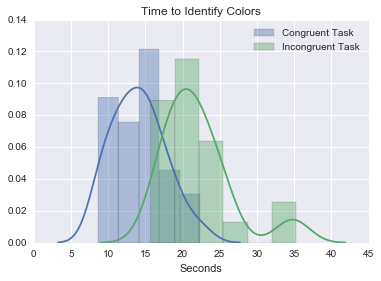

In [6]:
# Create distribution plot of Congruent and Incongruent
sns.distplot(stroop_data_df['Congruent'])
sns.distplot(stroop_data_df['Incongruent'])
sns.axlabel("Seconds", "")
plt.title("Time to Identify Colors")
plt.legend(["Congruent Task", "Incongruent Task"])
plt.show()

Individuals appear to more quickly identify colors in the CONGRUENT Task as opposed to the INCONGRUENT Task.

### Analysis

The Tstat (-8.021) is far below the T-critical value (-1.714). The null hypothesis is rejected. The INCONGRUENT task likely takes more time to complete.

One reason the INCONGRUENT task is different is because one side of the brain wants to read the word whereas the other side of the brain wants to read the color. This results in more time being placed on the INCONGRUENT task.

A similar experiment that may produce related results would be to construct shapes (squares, triangles, rectangles, etc.) out of words and have the participant name the shape. A sample congruent task could be a square made from multiple uses of the word square whereas a sample incongruent task could be a rectangle made from multiple uses of the word triangle.